If stocks are uncorrelated and each stock has a volatility of $\sigma$, then the equally weights portfolio risk is $\sigma_P=\frac{\sigma}{\sqrt{N}}$

For 1 stock:
$$\sigma_P=\sigma$$

For 2 stocks:
$$
\begin{align*}
    \sigma_P
    &= \left( \frac{\sigma^2}{2^2} + \frac{\sigma^2}{2^2} + \frac{2\rho_{1,2}}{2^2} \right)^\frac{1}{2}
    \\ &= \left( \frac{\sigma^2}{2} \right)^\frac{1}{2}
    \\ &= \frac{\sigma}{\sqrt{2}}
\end{align*}
$$

For n stocks:
$$\sigma^2_P=\sum^n_i\sum^n_jw_iw_jCov(i,j)$$

But we know that when $i\ne j$ that $Cov(i,j)=0$ and when $i=j$ then $Cov(i,j)=Var(i)=Var(j)=\sigma$. We also know $w_i=w_j=\frac{1}{n}$ by definition of an equally weighted portfolio. Thus we can simplify to the following:
$$
\begin{align*}
    \sigma^2_P
    &= \sum^n_i{w^2_iVar(i)}
    \\ &= \sum^n_i{w^2_i\sigma}
    \\ &= n \frac{\sigma^2}{n^2}
    \\ &= \frac{\sigma^2}{n}
    \\ \sigma_P
    &= \frac{\sigma}{\sqrt{n}}
\end{align*}
$$

The _average risk_  is $\sigma$ while the _portfolio risk_ is $\frac{\sigma}{\sqrt{n}}$

Rather than assume stocks have zero correlation, assume they all have a correlation of $\rho$ with each other. Each stock still has risk of $\sigma$, but now the portfolio's risk is a determined by more than just the number of assets:
$$\sigma_P=\sigma\sqrt{\frac{1 + \rho(n-1)}{n}}$$

And as the number of stocks goes to infinity:
$$\lim_{n \to \infty} \sigma_P=\sigma\sqrt{\rho}$$

__Relating Annual and Monthly Risk:__

Because the autocorrelation of stock prices is zero, we can relate the variance from two different time periods. Consider one time period one month and the other one year. If we know the variance of one of these periods, then do we know the variance for the other?

It seems: $\sigma^2_{annually}=12\cdot\sigma^2_{monthly}$

I believe this is something inherent to time series random variables. Imagine a random walk, where each step is indentical and independent of the last. While we expect the variable to end up in the location that it started if it has a 50% change to go +1 and 50% to go -1, the longer we make the time period, the more variability we can have. There must be some way to prove this, and I probably did at one point, but it does make intuitive sense.

Thus, if we simplify we get, $\sigma_{annually}=\sqrt{12}\cdot\sigma_{monthly}$

We call the difference between a benchmark portfolio and (active) manager's portfolio the _active return_. $r_{PA} = r_P - r_B$ where $r_P$ is the portfolio return, $r_B$ is the benchmark return, and $r_{PA}$ is the _active_ return of the portfolio.

We define __active risk__ as:
$$\psi_P=Std\{r_{PA}\}=Std\{r_P-r_B\}$$

We sometimes call $\psi_P$ the _tracking error_ of the portfolio because it describes how well the portfolio can track a benchmark. If $\psi_P=0$ I believe our portfolio tracks the benchmark perfectly? 

Another important measure of risk is __residual risk__. Residual risk is the "risk of the return orthogonal to the systematic return." It is the risk in our portfolio that is independent of systematic return.
$$\omega_P=\sqrt{\sigma^2_P-\beta^2_P\sigma^2_B}$$
$$ \beta_P = \frac{Cov\{r_P,r_B\}}{Var\{r_B\}}$$

In [7]:
import numpy as np
import seaborn as sns
# Graphing:
# Min x1(.0625x1 + .0625x2) + x2(.0625x1 + .25x2)
# S.T. x1+x2=1, x1>=0, x2>=0

In [8]:
n = 100
w1 = np.linspace(0, 1, n)
risk = np.zeros(n)

for i in range(n):
    risk[i] = w1[i]*(.0625*w1[i] + .0625*(1-w1[i])) + (1-w1[i])*(.0625*w1[i] + .25*(1-w1[i]))

<AxesSubplot:>

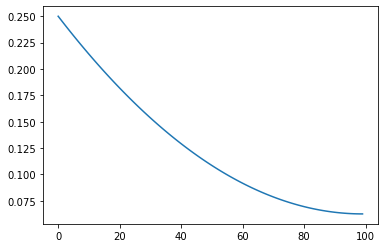

In [9]:
sns.lineplot(data=risk)

In [10]:
np.min(risk) #when x1=1 and x2=0

0.0625

### Technical Appendix

Our goal is to define a risk model in two parts - the first part models returns:
$$r=X \cdot b+ u$$

Where $\textbf{r}$ is a column vector of length $N$ assets, $\textbf{X}$ is a matrix of shape $N$ assets by $K$ factor exposures, $\textbf{b}$ is a vector of factor returns of shape $K$, and $\textbf{u}$ is a vector of specific returns of shape $N$.

$$
\begin{equation*}
    A_{m,n} = 
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
    a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
    \end{pmatrix}
\end{equation*}
$$